# Problem Set 1

## FINM 37301 - 2023

### UChicago Financial Mathematics

* Aman Krishna

In [118]:
import pandas as pd
import numpy as np
import math
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

from scipy.optimize import fsolve

from matplotlib import pyplot as plt
import warnings
pd.options.display.float_format = '{:.6f}'.format
warnings.filterwarnings("ignore")
pd.set_option("display.precision", 4)

In [119]:
# Create a Spot Rate Class to store the spot rates and the base currency and foreign currency
class SpotRate:
    def __init__(self, base, foreign, spot_rates):
        self.base = base
        self.foreign = foreign
        self.spot_rates = spot_rates
    #Create a method to exchange the base currency and foreign currency amounts
    def exchange(self, base_amount, foreign_amount):
        if base_amount == 0:
            print(f'The amount of equivalent {self.base} is {round(foreign_amount / self.spot_rates,4):,}')
        elif foreign_amount == 0:
            print(f'The amount of equivalent {self.foreign} is {round(base_amount * self.spot_rates,4):,}')
        else:
            return "Please enter either the base amount or the foreign amount"

#### 1) If EURJPY is 145.35, how many EUR can JPY 250,000,000 buy?

In [120]:
EURJPY = SpotRate("EUR", "JPY", 145.35)
EURJPY.exchange(0, 250000000)

The amount of equivalent EUR is 1,719,986.2401


#### 2) Assuming the following rates (which include both bid and offer) <br> EURUSD 1.0625 / 27 USDJPY 136.35 / 40

In [121]:
#EURUSD 1.0625 / 27 USDJPY 136.35 / 40
EURUSDbid = SpotRate("EUR", "USD", 1.0625)
EURUSDask = SpotRate("EUR", "USD", 1.0627)
USDJPYbid = SpotRate("USD", "JPY", 136.35)
USDJPYask = SpotRate("USD", "JPY", 136.40)

#### a) If a customer (i.e., market taker) buys USD 25 million versus EUR, what will the EUR amount be?

In [122]:
EURUSDbid.exchange(0,25000000)

The amount of equivalent EUR is 23,529,411.7647


#### b) If a customer buys USD 10 million versus JPY, what will the JPY amount be?

In [123]:
USDJPYask.exchange(10000000,0)

The amount of equivalent JPY is 1,364,000,000.0


#### 3) Derive the following cross rates from their components using the spot rates listed below. Assume all rates are mid-market and ignore bid-offer spread for this exercise
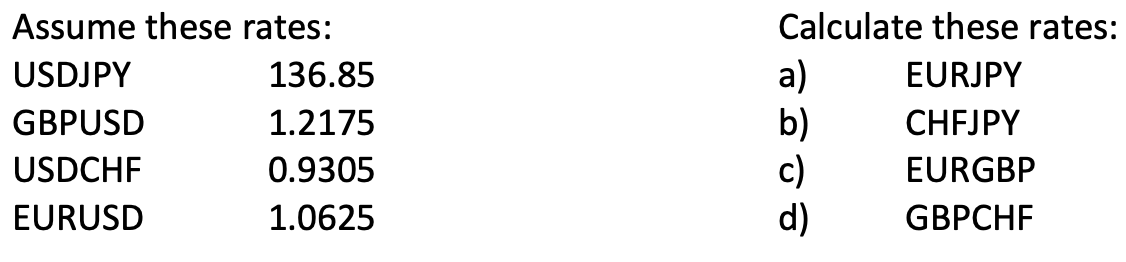

In [124]:
USDJPY = SpotRate("USD", "JPY", 136.85)
GBPUSD = SpotRate("GBP", "USD", 1.2175)
USDCHF = SpotRate("USD", "CHF", 0.9305)
EURUSD = SpotRate("EUR", "USD", 1.0625)

#### a) EURJPY

In [125]:
EURJPY = EURUSD.spot_rates * USDJPY.spot_rates
print(round(EURJPY,4))

145.4031


#### b) CHFJPY

In [126]:
CHFJPY = (1/USDCHF.spot_rates) * USDJPY.spot_rates
print(round(CHFJPY,4))

147.0715


#### c) EURGBP

In [127]:
EURGBP = EURUSD.spot_rates * (1/GBPUSD.spot_rates)
print(round(EURGBP,4))

0.8727


#### d) GBPCHF

In [128]:
GBPCHF = GBPUSD.spot_rates * USDCHF.spot_rates
print(round(GBPCHF,4))

1.1329


#### 4) A trader has the following position, selling CAD 35.70 million versus USD at 1.4120. If the current USDCAD rate is 1.3628, what is the mark-to-market value of the position?

In [129]:
USDCAD = SpotRate("USD", "CAD", 1.3628)
print(f'The USD market equivalent of 35.7 million CAD is $ {round(35700000/USDCAD.spot_rates,4):,}')
print(f"The trader's position is $ {round(35700000/1.4120,4):,}")
print(f'Net M-2-M position is $, {(round(35700000/1.4120 - 35700000/USDCAD.spot_rates,4)):,}')

The USD market equivalent of 35.7 million CAD is $ 26,196,066.921
The trader's position is $ 25,283,286.119
Net M-2-M position is $, -912,780.8021


#### 5) A USD-based trader has the following position: selling EUR 105 million versus CHF at a spot EURCHF rate of 1.1025. The current spot EURCHF rate is 0.9865.

In [130]:
EURCHF_t = SpotRate("EUR", "CHF", 1.1025)
EURCHF_s = SpotRate("EUR", "CHF", 0.9865)

#### a) What do you need to know to calculate the mark-to-market value of the position (in USD)?
>The trader needs to know either the EURUSD or CHFUSD spot rate to calculate the mark-to-market value of the position.

#### b) Choose a level for the rate you need to know and show what USD-value the trade would have.

#### USING USDCHF RATES FROM PREVIOUS QUESTION

In [131]:
print(f'The trader selling EUR 105 million at 1.1025 is **receiving CHF {round(105000000 * EURCHF_t.spot_rates,4):,}**')
print(f'The current market value of the position is **CHF {round(105000000 * EURCHF_s.spot_rates,4):,}**')
print(f'The M-2-M position is **CHF {round(-105000000 * EURCHF_s.spot_rates + 105000000 * EURCHF_t.spot_rates,4):,}**')
CHF_amount = -105000000 * EURCHF_s.spot_rates + 105000000 * EURCHF_t.spot_rates
print('The USDCHF spot rate is', round(0.9305,4))
USDCHF = SpotRate("USD", "CHF", 0.9305)
print(f'The M-2-M position in USD is **${round(CHF_amount / USDCHF.spot_rates,4):,}**')

The trader selling EUR 105 million at 1.1025 is **receiving CHF 115,762,500.0**
The current market value of the position is **CHF 103,582,500.0**
The M-2-M position is **CHF 12,180,000.0**
The USDCHF spot rate is 0.9305
The M-2-M position in USD is **$13,089,736.7007**


#### USING EURUSD RATES FROM PREVIOUS QUESTION

In [132]:
print(f'The trader selling EUR 105 million at 1.1025 is **receiving CHF {round(105000000 * EURCHF_t.spot_rates,4):,}**')
print(f'The current market value of the position is **CHF {round(105000000 * EURCHF_s.spot_rates,4):,}**')
print(f'The M-2-M position is **CHF {round(-105000000 * EURCHF_s.spot_rates + 105000000 * EURCHF_t.spot_rates,4):,}**')
CHF_amount = -105000000 * EURCHF_s.spot_rates + 105000000 * EURCHF_t.spot_rates
print('The USDCHF spot rate is', round(((1/EURUSD.spot_rates)*EURCHF_s.spot_rates),4))
USDCHF = SpotRate("USD", "CHF", ((1/EURUSD.spot_rates)*EURCHF_s.spot_rates))
print(f'The M-2-M position in USD is **${round(CHF_amount / USDCHF.spot_rates,4):,}**')

The trader selling EUR 105 million at 1.1025 is **receiving CHF 115,762,500.0**
The current market value of the position is **CHF 103,582,500.0**
The M-2-M position is **CHF 12,180,000.0**
The USDCHF spot rate is 0.9285
The M-2-M position in USD is **$13,118,347.6939**


#### 6) A EUR-based car manufacturing company sources parts from Mexico.

#### a) What is the company’s immediate FX exposure (i.e., which currency pair is the company exposed to and is it long or short that pair?)

>Since, the European company sources parts from Mexico (i.e payments made in MXN), the company is **exposed to EURMXN currency pair**. <br>
>The company is **short EURMXN currency pair**. This is because the company is buying MXN and selling EUR.

#### b) What type of hedge would reduce the company’s FX risk?

>The company could use:-
>1. Forward contract to buy MXN at a fixed rate at a future date.
>2. Currency swap to match the foreign currency exposure to the foreign currency income.
>to hedge its FX risk.

#### 7) With the following information and assuming covered interest rate parity holds, determine if you would pay or earn the points and what the forward rate would be. (Note that the points are given without positive or negative signs.)

#### a) USDJPY spot rate 137.10, JPY deposit rate -0.10%, USD deposit rate 4.50%. You want to sell USD forward against the yen, and the forward points are quoted as “170”.

> - For USDJPY, the forward points multiplier is 100. <br>
> - Since the interest rates in JPY is lower than USD, the forward rate will be lower than the spot rate. <br>
> - JPY is "expected" to appreciate against USD. <br>
> - The fwd points will be subtracted from the spot rate to calculate the fwd rate. <br>

In [133]:
USDJPY_1 = SpotRate("USD", "JPY", 137.1)
USDJPY_forward = USDJPY_1.spot_rates - 170/100
print(f'The USDJPY forward rate is **{round(USDJPY_forward,4)}** as we have to pay a premium (fwd points) to cover for the interest rate differential')

The USDJPY forward rate is **135.4** as we have to pay a premium (fwd points) to cover for the interest rate differential


#### b) EURGBP spot rate 0.8750, EUR deposit rate 2.50%, GBP deposit rate 3.50%. You want to sell EUR forward against the British pound, and the forward points are quoted as “37”. 

> - For EURGBP, the forward points multiplier is 10000. <br>
> - Since the interest rates in GBP is higher than EUR, the forward rate will be higher than the spot rate. <br>
> - GBP is "expected" to depreciate against EUR. <br>
> - The fwd points will be added to the spot rate to calculate the fwd rate. <br>

In [134]:
EURGPB_1 = SpotRate("EUR", "GBP", 0.8750)
EURGPB_forward = EURGPB_1.spot_rates + 37/10000
print(f'The EURGBP forward rate is **{round(EURGPB_forward,4)}** as we are receiving a premium (fwd points) to cover for the interest rate differential')

The EURGBP forward rate is **0.8787** as we are receiving a premium (fwd points) to cover for the interest rate differential


#### 8) Find the all-in 6-month forward rate for GBPUSD, assuming covered interest rate parity holds, ignoring bid/ask, and assuming the following:
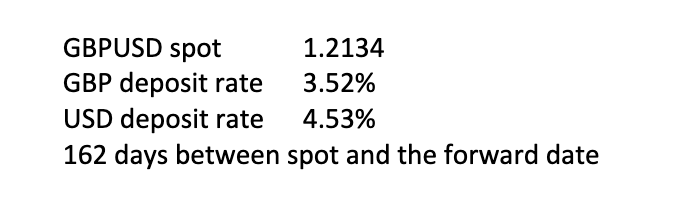
#### Assume that GBP money market rates follow ACT/365, USD rates follow ACT/360.

In [135]:
GBPUSD_forward = 1.2134 * (1 + 0.0453*162/360) / (1 + 0.0352*162/365)
print(f'The GBPUSD forward rate is **{round(GBPUSD_forward,4)}** ')

The GBPUSD forward rate is **1.2191** 


#### 9) Par forwards  <br> <br>A client wants to sell EUR versus USD in a strip of three forwards, but they want you (a market maker) to quote a single rate for all three forwards as a single package. <br><br> The client wishes to pay EUR 10 million on each of the 1-year, 2-year and 3-year dates.  <br><br> Calculate the rate you should quote. Assume all USD interest rates for all maturities equal 4.75% (use an annual bond basis for simplicity), and assume the following spot and forward rates:
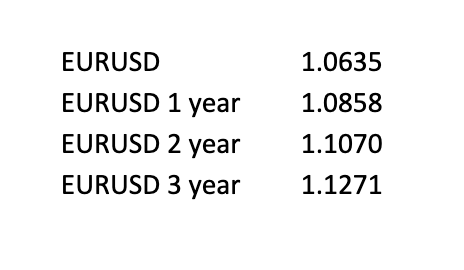

In [136]:
usd1year = 10e6 * 1.0858
usd2year = 10e6 * 1.1070
usd3year = 10e6 * 1.1271
disc1 = 1/1.0475
disc2 = 1/(1.0475 * 1.0475)
disc3 = 1/(1.0475 * 1.0475 * 1.0475)
pvusd = usd1year * disc1 + usd2year * disc2 + usd3year * disc3
pveur = 10e6 * disc1 + 10e6 * disc2 + 10e6 * disc3
par_forward = pvusd / pveur
print(f'The par forward rate is **{round(par_forward,4)}** ')

The par forward rate is **1.106** 


#### 10) (This problem counts for 4 points.) Assume there are 153 days between spot and the 5-month forward date, assume covered interest rate parity holds, and assume the following rates (all mid-market rates) and that both deposit rates are quoted ACT/360: 
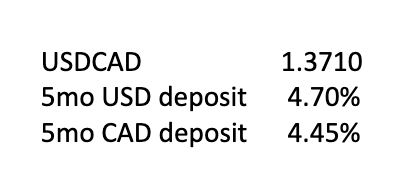
#### How many pips would spot have to move, and in which direction, before the forward points moved 1 pip (higher)?

In [137]:
def forward_CIRP(spot_rate, domestic_rate, foreign_rate, days, convention=360):
    return spot_rate * (1 + (domestic_rate * days / convention)) / (1 + (foreign_rate * days / convention))

In [138]:
USDCAD_spot = 1.3710
USD_foreign_Rate = 0.0470
CAD_domestic_Rate = 0.0445
days = 153
forward_rate_initial = forward_CIRP(USDCAD_spot, CAD_domestic_Rate, USD_foreign_Rate, days)
round(forward_rate_initial,4)

1.3696

$ Forward Rate = Spot Rate + (Forward Points / 10000) $ ...1 <br>
$ Forward Rate = Spot Rate * (1+ Rate_{domestic} * t/360) / (1+ Rate_{foreign} * t/360) $ ...2 <br>

Using these two equations, we can solve for the spot/forward point sensitivity. <br>
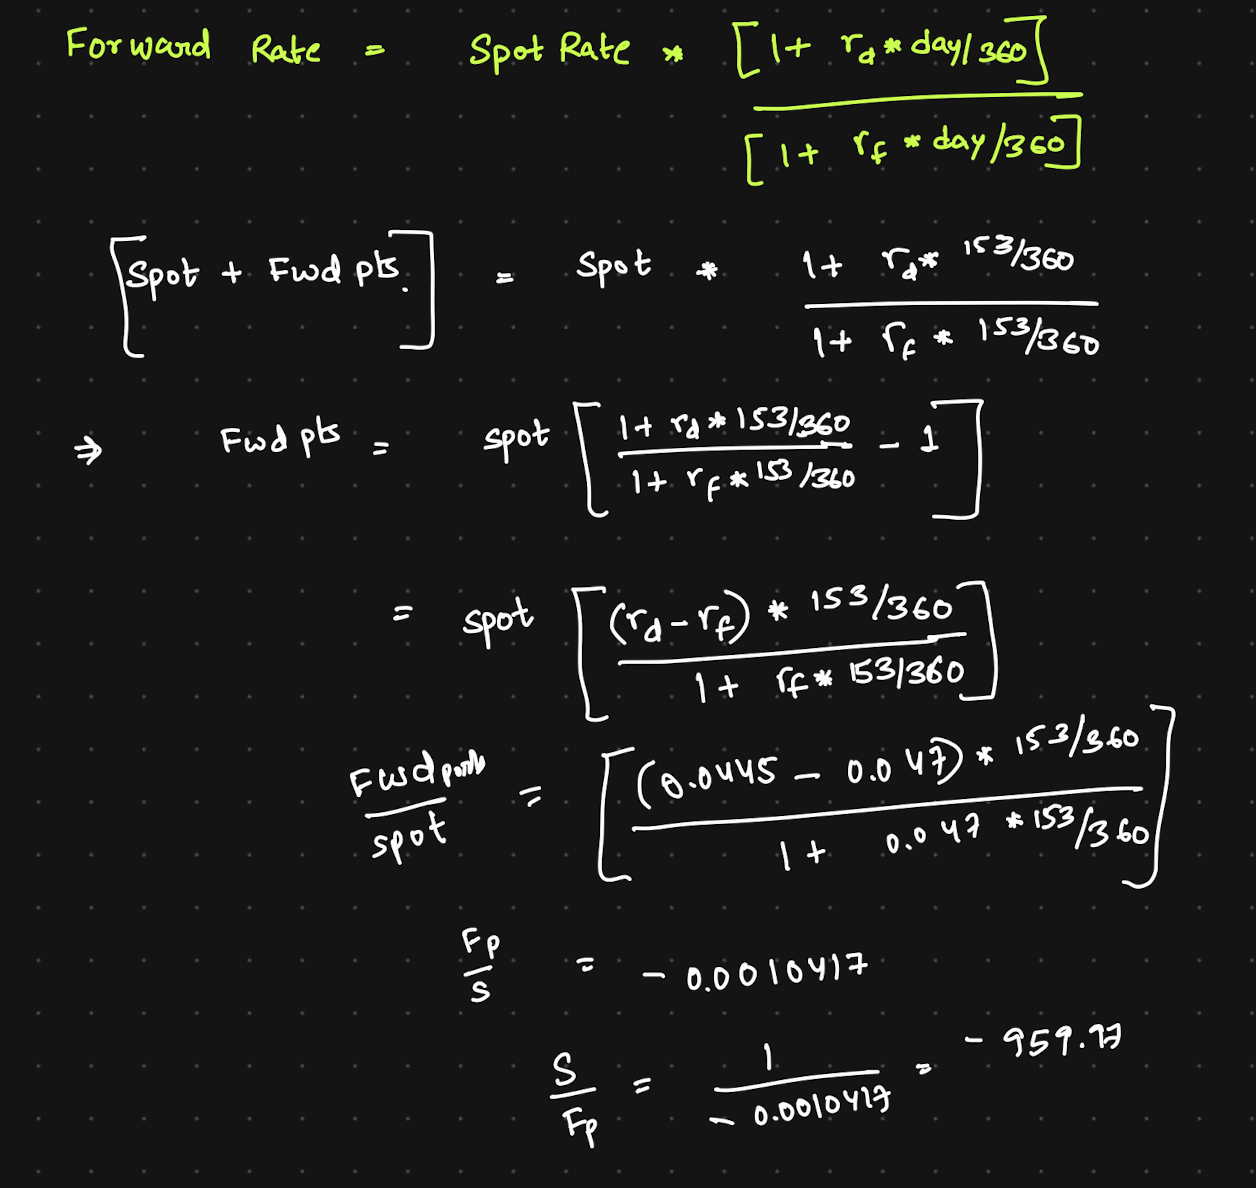
$ Spot / Forward Points = -959.97$ <br>
So for every 1 pip change in Forward Points, the spot rate will decrease by 959.97 pips. <br>